## Plotar as leis de Kepler
### Adaptado de https://github.com/katiebreivik/Keplers_Laws/blob/master/Graphing%20Kepler's%20Laws%20with%20Python.ipynb

In [12]:
import matplotlib.pyplot as plt
import numpy as np


## Funções:
### (1) Uma função precisa de variáveis (between parentheses) e retorna um resultado


In [4]:
def keplerIII_period_to_semimajor_axis(orbital_period):
    #########################################################
    # Units: orbital period [yr], separation [au]           #
    #########################################################
    semimajor_axis_cubed = orbital_period**2
    semimajor_axis = semimajor_axis_cubed**(1./3.)

    return semimajor_axis

def make_kepler_orbit(eccentricity,orbital_period):
    ##########################################################
    # Units: orbital period [years]                          #
    # returns: 500 true anomaly values throughout the orbit  #
    ##########################################################
    nStep = 500
    tRange = np.linspace(0.0,orbital_period,nStep)

    theta = []
    for time in tRange:
        PsiDiff = 1.0
        M = 2*np.pi*time/orbital_period
        PsiOld = M
        theta0old = 180.0
        while PsiDiff > 1e-10:
            PsiNew = M + eccentricity*np.sin(PsiOld)
            PsiDiff = PsiNew-PsiOld
            PsiOld = PsiNew
        theta0 = 2*np.arctan(((1+eccentricity)/(1-eccentricity))**(0.5)*np.tan(PsiOld/2.))
        theta.append(theta0)
    return theta

## Primeiro, vamos simular a órbita da Terra. Precisamos especificar todas as variáveis ​​usadas na função ‘make_kepler_orbit’. Pela forma da 3a lei de Kepler acima, qual a unidade do período orbital (orbital_period)?

##Precisamos também indicar a excentricidade da Terra (eccentricity).


In [5]:
orbital_period = 1.0
eccentricity = 0.02

## Para plotar a órbita Kepleriana, precisamos enviar as variáveis ​​corretas para a função e usar a variável que a função envia de volta. make_kepler_orbit envia de volta uma lista de ângulos $\theta$ ; esses são os ângulos de anomalia verdadeira para cada tempo na órbita.

## A lista que é enviada de volta de make_kepler_orbit será chamada de 'list1' (se quiser pode mudar para outro nome)

In [16]:
list1 = make_kepler_orbit(eccentricity,orbital_period)


## Para fazer os plots, precisamos especificar a posição x e y de cada valor do ângulo $\theta$ "true anomaly" (anomalia verdadeira). Para isso, usamos a primeira lei de Kepler (slide 34 da aula 3):

# r = a (1 - e$^2$)/(1 - e cos $\theta$)

## Na equação da elipse, $\theta$ é a 'true_anomaly'.

## A função a seguir, orbit(semimajor_axis,e,true_anomaly), calcula x e y para a elipse e retorna os valores xorbit e yorbit. Com esses valores de x e y, podemos plotar a orbita!

In [8]:
def orbit(semimajor_axis,eccentricity,true_anomaly):
    ##############################################
    # Units: separation [au] #
    ##############################################

    # define the shape equation
    r_orbit = semimajor_axis*(1 - eccentricity**2)/(1 + eccentricity*np.cos(true_anomaly))
    x_orbit = r_orbit*np.cos(true_anomaly)
    y_orbit = r_orbit*np.sin(true_anomaly)


    return x_orbit,y_orbit

## Observe que a função órbita precisa do semieixo maior. Isso significa que precisaremos usar a função da terceira lei de Kepler para converter o período orbital no semieixo maior.


In [9]:
semimajor_axis = keplerIII_period_to_semimajor_axis(orbital_period)

## Agora que temos a separação (semi-eixo maior "a"), podemos chamar a função órbita. A função de órbita precisa do semi-eixo maior, excentricidade e anomalia verdadeira $\theta$ (que é retornada pela função make_kepler_orbit).


In [10]:
xOrbit, yOrbit = orbit(semimajor_axis,eccentricity,list1)


## Graças à função orbit, podemos traçar nossos valores x_orbit e y_orbit. Neste gráfico, colocamos o Sol no centro (0,0).

## Observe que definimos a seguir plt.axis('equal') na quinta linha; isso faz com que o gráfico use o mesmo tamanho para os eixos x e y. Comente a linha que iguala os eixos digitando # no começo da linha. O que acontece com a órbita da Terra? Por que isso é enganoso? Preencha sua resposta na caixa abaixo do gráfico.


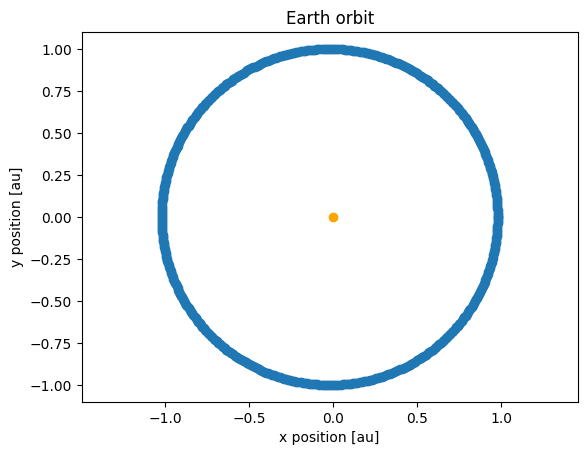

In [17]:
plt.title('Earth orbit')
# The Sun is located at the origin.
plt.scatter(0,0, color='orange')
plt.scatter(xOrbit,yOrbit)
plt.axis('equal')
plt.xlabel('x position [au]')
plt.ylabel('y position [au]')
plt.show()

O plot sem o "equal" é errado porque:

## Agora que sabemos como fazer a órbita da Terra, podemos fazer órbitas para qualquer planeta do Sistema Solar! Precisaremos saber o período orbital do planeta em anos e sua excentricidade. Estes dados estão abaixo para os outros planetas e Plutão:

#### Planet = Mercury, orbital period = 0.48 years, eccentricity = 0.21
#### Planet = Venus, orbital period = 0.62 years, eccentricity = 0.01
#### Planet = Mars, orbital period = 1.88 years, eccentricity = 0.09
#### Planet = Jupiter, orbital period = 11.86 years, eccentricity = 0.05
#### Planet = Saturn, orbital period = 29.46 years, eccentricity = 0.05
#### Planet = Uranus, orbital period = 84.02 years, eccentricity = 0.05
#### Planet = Neptune, orbital period = 164.8 years, eccentricity = 0.01
#### Planeta anão = Pluto, orbital period = 248.0 years, eccentricity = 0.25
#### Cometa = Halley, orbital period = 75.3 years, eccentricity = 0.967

### Quais planetas (incluindo a Terra) têm a órbita mais e menos circular?. Preencha suas respostas abaixo


2 planetas com órbitas mais circulares:

2 planetas com órbitas menos circulares:

:### Como exemplo, a seguir a órbita de Mercúrio. Após a órbita de Mercúrio, plotar Urano, Netuno, Plutão e o Cometa Halley.

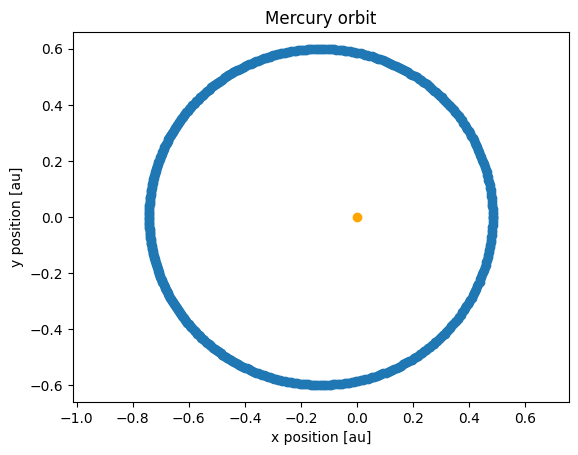

In [15]:
# Define Mercury's parameters;
orbital_period_Mercury = 0.48
eccentricity_Mercury = 0.21

# compute Mercury's true anomaly
true_anomaly_Mercury = make_kepler_orbit(eccentricity_Mercury,orbital_period_Mercury)

# compute Mercury's separation
semimajor_axis_Mercury = keplerIII_period_to_semimajor_axis(orbital_period_Mercury)

# compute Mercury's x and y orbital coordinates
xOrbit_Mercury, yOrbit_Mercury = orbit(semimajor_axis_Mercury,eccentricity_Mercury,
                                       true_anomaly_Mercury)

plt.title('Mercury orbit')
# The Sun is located at the origin.
plt.scatter(0,0, color='orange')
plt.scatter(xOrbit_Mercury,yOrbit_Mercury)
plt.axis('equal')
plt.xlabel('x position [au]')
plt.ylabel('y position [au]')
plt.show()


In [ ]:
##### COLOCAR AQUI SEU CÓDIGO PARA PLOTAR Urano, Netuno, Plutão e o Cometa Halley #####




RESPONDA: Dos quatro corpos acima.
A) Qual se aproxima mais do Sol?
B) Qual se afasta mais do Sol?

# EXOPLANETAS

## Vamos comparar agora o planeta WASP-18, que tem massa bem superior a Júpiter e que orbita perto da sua estrela. É um "hot Jupiter".

## Dados de WASP-18b e de Júpiter:
#### Planet = WASP-18b, orbital period = 0.24 years, eccentricity = 0.01

#### Planet = Jupiter, orbital period = 11.86 years, eccentricity = 0.05

## Como você compararia o Wasp 18b com Júpiter? Preencha sua resposta na célula abaixo


Como a excentricidade do Wasp-18b se compara à excentricidade de Júpiter:

Como o período orbital do Wasp-18b se compara ao período orbital de Júpiter:

## Agora faça um gráfico da órbita do WASP-18b e da órbita de Júpiter. Incluir um título e nomes dos eixos!

## Como o formato do Wasp 18b é semelhante ao de Júpiter? Como é diferente?

WASP-18b é semelhante a Júpiter porque:


WASP-18b é diferente a Júpiter porque:

## Por que você acha que os astrônomos chamaram planetas como WASP 18b de 'Júpiteres Quentes'? Forneça seu raciocínio para esta afirmação.

Astrônomos chamaram planetas como WASP-18b de 'Júpiteres Quentes' porque: